We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-10-15 16:58:03--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.224.128.122, 13.224.128.87, 13.224.128.29, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.224.128.122|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-10-15   15     10  2020     32       1             Afghanistan    AF   
1 2020-10-14   14     10  2020     66       0             Afghanistan    AF   
2 2020-10-13   13     10  2020    129       3             Afghanistan    AF   
3 2020-10-12   12     10  2020     96       4             Afghanistan    AF   
4 2020-10-11   11     10  2020      0       0             Afghanistan    AF   
5 2020-10-10   10     10  2020     10       1             Afghanistan    AF   
6 2020-10-09    9     10  2020     77       2             Afghanistan    AF   
7 2020-10-08    8     10  2020     68       1             Afghanistan    AF   
8 2020-10-07    7     10  2020     62       2             Afghanistan    AF   
9 2020-10-06    6     10  2020    145       5             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           1.992547           
1                                           1.945231           
2                                           1.811168           
3                                           1.503611           
4                                           1.251257           
5                                           1.343261           
6                                           1.332746           
7                                           1.172396           
8                                           1.059362           
9                                           1.083020

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       49152
day                                                           49152
month                                                         49152
year                                                          49152
cases                                                         49152
deaths                                                        49152
countriesAndTerritories                                       49152
geoId                                                         49152
countryterritoryCode                                          49088
popData2019                                                   49088
continentExp                                                  49152
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    46371
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                          \
geoId          AD      AE     AF   AG   AI     AL      AM     AO       AR   
dateRep                                                                     
2019-12-31    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-01    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-02    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-03    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-04    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
...           ...     ...    ...  ...  ...    ...     ...    ...      ...   
2020-10-11    0.0  1129.0    0.0  0.0  0.0  165.0   649.0   73.0  12428.0   
2020-10-12    0.0  1096.0   96.0  0.0  0.0  168.0   715.0  215.0  10310.0   
2020-10-13  299.0  1064.0  129.0  0.0  0.0  171.0  1115.0  120.0   9524.0   
2020-10-14    0.0  1315.0   66.0  0.0  0.0  182.0  1058.0  122.0  13305.0   
2020-10-15  195.0  1431.0   32.0  1.0  0.0  203.0     0.0  192.0  14932.0   

                    ... deaths                                                 
geoId           AT  ...     VC   VE   VG   VI   VN   XK   YE     ZA   ZM   ZW  
dateRep             ...                                                        
2019-12-31     0.0  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-01     0.0  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-02     0.0  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-03     0.0  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-04     0.0  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
...            ...  ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  ...  
2020-10-11   901.0  ...    0.0  7.0  0.0  0.0  0.0  1.0  1.0  126.0  1.0  1.0  
2020-10-12  1298.0  ...    0.0  6.0  0.0  0.0  0.0  4.0  1.0  107.0  0.0  0.0  
2020-10-13   608.0  ...    0.0  7.0  0.0  0.0  0.0  2.0  0.0    0.0  9.0  0.0  
2020-10-14  1171.0  ...    0.0  6.0  0.0  0.0  0.0  1.0  1.0  248.0  0.0  0.0  
2020-10-15  1606.0  ...    0.0  4.0  0.0  0.0  0.0  1.0  0.0  123.0  0.0  1.0  

[290 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-10-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-10-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-10-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-10-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-10-15   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-10-11 NaN  NaN NaN NaN NaN NaN NaN  
2021-10-12 NaN  NaN NaN NaN NaN NaN NaN  
2021-10-13 NaN  NaN NaN NaN NaN NaN NaN  
2021-10-14 NaN  NaN NaN NaN NaN NaN NaN  
2021-10-15 NaN  NaN NaN NaN NaN NaN NaN  

[655 rows x 420 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    655.000000
mean     327.000000
std      189.226496
min        0.000000
25%      163.500000
50%      327.000000
75%      490.500000
max      654.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [9]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

wave = -1

df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

plotlist = [(smeasure, country), (pmeasure, country)]

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

In [10]:
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]
#mincases = popdata / 1e6
#mincases = 100
mincases = max(popdata / 1e6, 2)
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 17


# Iterate here

In [11]:
wave += 1
curwave = wmeasure + str(wave)
df_geo[(curwave, country)] = 0
plotlist += [(curwave, country)]

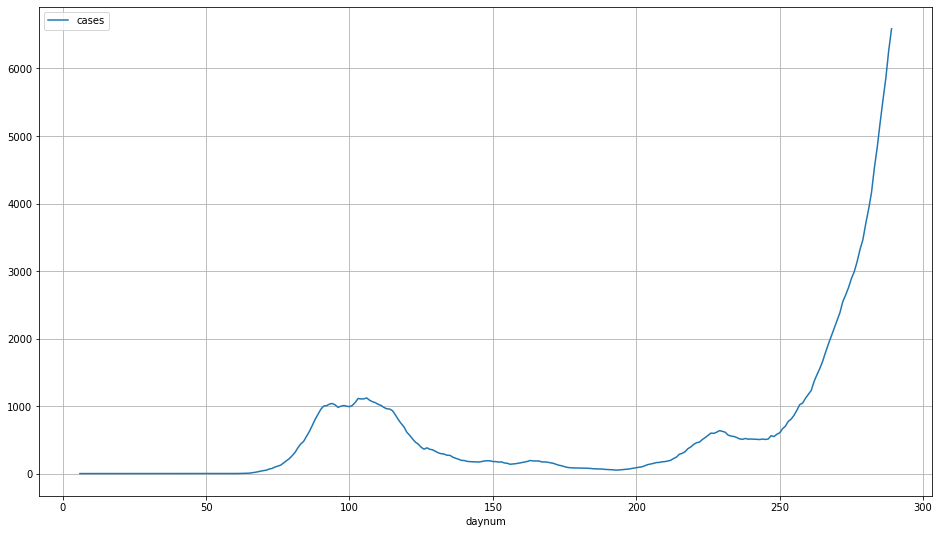

In [12]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[rmeasure][country]})
df_pred[df_pred[measure].notnull()].plot(x='daynum', y=measure, figsize=(16, 9), grid=True)

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

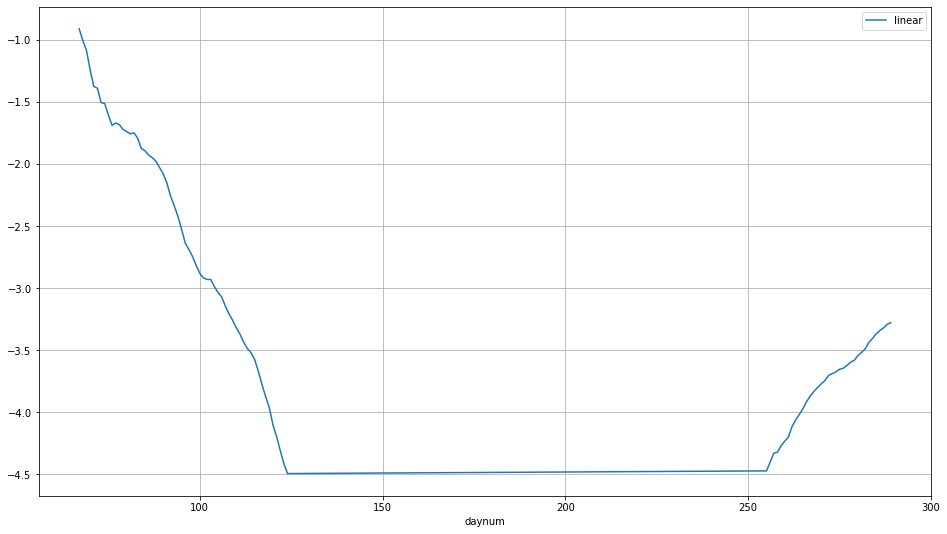

In [13]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

df_pred['linear'] = np.log(df_pred['gumdiv'])

df_pred = df_pred[(df_pred['linear'] < -0.5) &
                  (df_pred['linear'] > -4.5)]

df_pred.plot(x='daynum', y='linear', figsize=(16, 9), grid=True)

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.947856  1      0.969  0.000  0.000  
1     0       0    56    0.047027  3      0.050  0.950  0.948  
2     0       0    58    0.010585  5      0.012  0.989  0.988  
3     0       0    48    0.005365  7      0.006  0.994  0.994  
4     0       0    70    0.004350  9      0.005  0.995  0.994  
5     0       0    20    0.003604  11     0.005  0.996  0.995  
6     0       0    6     0.001944  13     0.003  0.998  0.997  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   13     0.00  0.003  0.998  0.997  
1     8   12     0.00  0.003  0.998

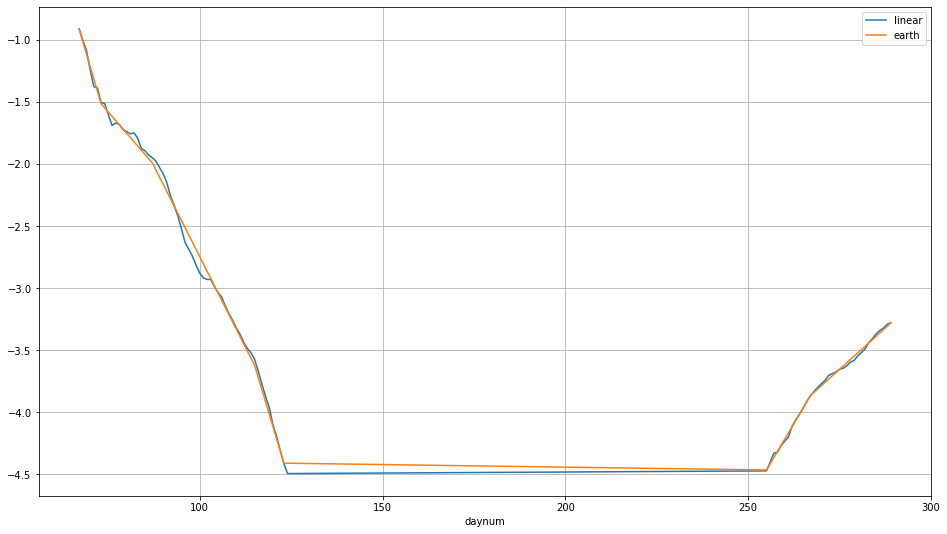

In [14]:
from pyearth import Earth

eax = df_pred['daynum'].values.reshape(-1, 1)
eay = df_pred['linear'].values.reshape(-1, 1)

#model = Earth()
#model = Earth(minspan=0)
model = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
model.fit(eax, eay)

print(model.trace())
print(model.summary())

df_pred['earth'] = model.predict(eax)

daymin = df_pred['daynum'].min()
daymax = df_pred['daynum'].max()
print('From {} to {}'.format(daymin, daymax))

df_pred.plot(x='daynum', y=['linear', 'earth'], figsize=(16, 9), grid=True)

In [15]:
#df_pred['gbgrad'] = np.gradient(df_pred['linear'])
#df_pred['eagrad'] = np.gradient(df_pred['earth'])

df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

#df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
#df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

df_pred.plot(x='daynum', y=['gbgrad', 'eagrad'], figsize=(16, 9), grid=True)

In [16]:
from pyearth import export
fitmod = export.export_python_function(model)
print(export.export_python_string(model))

def model(example_iterator):
    accessors = [lambda x: -10.248742835550823,
		lambda x: 0.09795809582758014 * max(0, x[0] - 123.0),
		lambda x: 0.050318092695429285 * max(0, 255.0 - x[0]),
		lambda x: -0.040118355645896386 * max(0, 115.0 - x[0]),
		lambda x: -0.023349701913062893 * max(0, x[0] - 267.0),
		lambda x: -0.11421483260717669 * max(0, x[0] - 87.0),
		lambda x: 0.08995693946589668 * max(0, 87.0 - x[0]),
		lambda x: 0.06615840963769905 * max(0, x[0] - 73.0)]
    for x in example_iterator:
        yield sum(accessor(x) for accessor in accessors)
    


In [17]:
df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                   (df_pred['daynum'] == (daymin + 1)) |
                   (df_pred['daynum'] == daymax))
df_pred['daycount'] = df_pred.reset_index().index
df_pred[df_pred['knot']]

daynum        cases    gumdiv    linear     earth    gbgrad  \
2020-03-08      68    25.857143  0.365657 -1.006061 -1.015640 -0.092950   
2020-03-14      74    96.571429  0.219695 -1.515517 -1.550422 -0.008520   
2020-03-28      88   801.285714  0.138187 -1.979149 -2.050656 -0.027965   
2020-04-25     116   869.428571  0.025476 -3.670008 -3.721946 -0.093923   
2020-05-03     124   435.142857  0.011172 -4.494363 -4.410985 -0.077905   
2020-09-11     255   863.714286  0.011414 -4.472878 -4.465536  0.021485   
2020-09-12     256   938.571429  0.012252 -4.402089 -4.415634  0.070790   
2020-09-24     268  2036.571429  0.021665 -3.832035 -3.840163  0.036667   
2020-10-15     289  6588.000000  0.037626 -3.280058 -3.282572  0.012626   

              eagrad  knot  daycount  
2020-03-08 -0.100157  True         1  
2020-03-14 -0.033998  True         7  
2020-03-28 -0.058256  True        21  
2020-04-25 -0.098375  True        49  
2020-05-03 -0.000416  True        57  
2020-09-11 -0.054551  True        58  
2020-09-12  0.049902  True        59  
2020-09-24  0.026552  True        71  
2020-10-15  0.026552  True        92

In [18]:
df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

#df_knot['eadiff'] = df_knot['eagrad'] - df_knot['eagrad'].shift(1)
#df_knot['eamax'] = np.maximum.accumulate(df_knot['eagrad'])

df_knot

daynum  daycount    eagrad  daysdata  daystime
2020-03-08      68         1 -0.100157       6.0       6.0
2020-03-14      74         7 -0.033998      14.0      14.0
2020-03-28      88        21 -0.058256      28.0      28.0
2020-04-25     116        49 -0.098375       8.0       8.0
2020-05-03     124        57 -0.000416       1.0     131.0
2020-09-11     255        58 -0.054551       1.0       1.0
2020-09-12     256        59  0.049902      12.0      12.0
2020-09-24     268        71  0.026552      21.0      21.0
2020-10-15     289        92  0.026552       NaN       NaN

In [19]:
df_knot['cand'] = ((df_knot['daysdata'] >= 3) &
                   (df_knot['eagrad'] < -1/30))# &
#                   (df_knot['daysdata'] == df_knot['daystime']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand
2020-03-08      68         1 -0.100157       6.0       6.0   True
2020-03-14      74         7 -0.033998      14.0      14.0   True
2020-03-28      88        21 -0.058256      28.0      28.0   True
2020-04-25     116        49 -0.098375       8.0       8.0   True
2020-05-03     124        57 -0.000416       1.0     131.0  False
2020-09-11     255        58 -0.054551       1.0       1.0  False
2020-09-12     256        59  0.049902      12.0      12.0  False
2020-09-24     268        71  0.026552      21.0      21.0  False
2020-10-15     289        92  0.026552       NaN       NaN  False

In [20]:
df_knot['since'] = df_knot['daynum'] - daymin
#df_knot['score'] = - df_knot['eagrad']
#df_knot['score'] = - df_knot['eagrad'] / df_knot['since']
#df_knot['score'] = (df_knot['eagrad'] ** 2) / np.sqrt(df_knot['since'])
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-03-08      68         1 -0.100157       6.0       6.0   True      1   
2020-03-14      74         7 -0.033998      14.0      14.0   True      7   
2020-03-28      88        21 -0.058256      28.0      28.0   True     21   
2020-04-25     116        49 -0.098375       8.0       8.0   True     49   
2020-05-03     124        57 -0.000416       1.0     131.0  False     57   
2020-09-11     255        58 -0.054551       1.0       1.0  False    188   
2020-09-12     256        59  0.049902      12.0      12.0  False    189   
2020-09-24     268        71  0.026552      21.0      21.0  False    201   
2020-10-15     289        92  0.026552       NaN       NaN  False    222   

                   score  
2020-03-08  2.457171e-02  
2020-03-14  2.658906e-03  
2020-03-28  8.388956e-03  
2020-04-25  1.034573e-02  
2020-05-03  6.310941e-08  
2020-09-11  8.036482e-04  
2020-09-12  2.326512e-03  
2020-09-24  8.580333e-04  
2020-10-15           NaN

In [21]:
df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-03-08      68         1 -0.100157       6.0       6.0   True      1   
2020-03-14      74         7 -0.033998      14.0      14.0   True      7   
2020-03-28      88        21 -0.058256      28.0      28.0   True     21   
2020-04-25     116        49 -0.098375       8.0       8.0   True     49   
2020-05-03     124        57 -0.000416       1.0     131.0  False     57   
2020-09-11     255        58 -0.054551       1.0       1.0  False    188   
2020-09-12     256        59  0.049902      12.0      12.0  False    189   
2020-09-24     268        71  0.026552      21.0      21.0  False    201   
2020-10-15     289        92  0.026552       NaN       NaN  False    222   

                   score  choice  
2020-03-08  2.457171e-02    True  
2020-03-14  2.658906e-03   False  
2020-03-28  8.388956e-03   False  
2020-04-25  1.034573e-02   False  
2020-05-03  6.310941e-08   False  
2020-09-11  8.036482e-04   False  
2020-09-12  2.326512e-03   False  
2020-09-24  8.580333e-04   False  
2020-10-15           NaN   False

In [22]:
choice = df_knot[df_knot['choice']]
lower = choice['daynum'].values[0]
upper = choice['daysdata'].values[0] + lower
print('From {} to {}'.format(lower, upper))

From 68 to 74.0


From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [23]:
#lower = 185
#upper = 187

df_pred = df_pred[(df_pred['daynum'] >= lower) &
                  (df_pred['daynum'] <= upper)].copy()

slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
intercept = fitmod([[lower]])[0] - (lower * slope)

print('From {} to {} with slope {:1.4f} and intercept {:1.3f}'.format(
    lower, upper, slope, intercept))

beta = - 1 / slope
mu = beta * (intercept + np.log(beta))

df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

#final = np.exp(np.log(df_pred['scale']).mean())
final = df_pred['scale'].mean()

print('Gumbel beta {:1.3f} with mu {:1.0f} for {:1.0f}'.format(beta, mu, final))

From 68 to 74.0 with slope -0.0891 and intercept 5.045
Gumbel beta 11.220 with mu 84 for 4406


In [24]:
df_pred

daynum      cases    gumdiv    linear     earth    gbgrad  \
2020-03-08      68  25.857143  0.365657 -1.006061 -1.015640 -0.092950   
2020-03-09      69  36.000000  0.337349 -1.086636 -1.115797 -0.080575   
2020-03-10      70  43.285714  0.288571 -1.242813 -1.215954 -0.156177   
2020-03-11      71  50.571429  0.252137 -1.377784 -1.316110 -0.134971   
2020-03-12      72  66.428571  0.248796 -1.391121 -1.416267 -0.013338   
2020-03-13      73  76.000000  0.221574 -1.506997 -1.516424 -0.115876   
2020-03-14      74  96.571429  0.219695 -1.515517 -1.550422 -0.008520   

              eagrad   knot  daycount     pgumb        scale  
2020-03-08 -0.100157   True         1  0.006226  4153.099217  
2020-03-09 -0.100157  False         2  0.008053  4470.131823  
2020-03-10 -0.100157  False         3  0.010114  4279.772467  
2020-03-11 -0.100157  False         4  0.012363  4090.510690  
2020-03-12 -0.100157  False         5  0.014743  4505.681189  
2020-03-13 -0.100157  False         6  0.017189  4421.542543  
2020-03-14 -0.033998   True         7  0.019629  4919.800206

Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

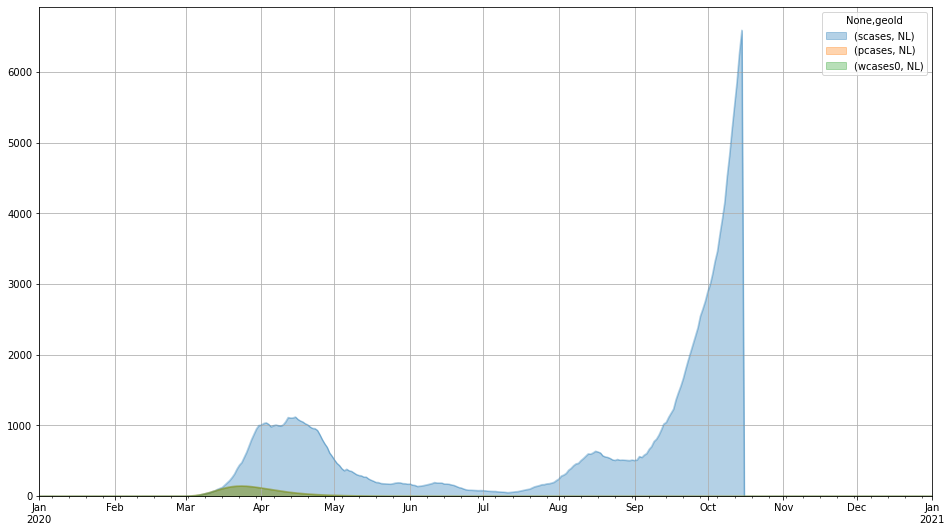

In [25]:
df_geo[(curwave, country)] = gumpdf(df_geo['daynum'], beta, mu) * final
df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
df_geo[plotlist].loc['20200101':'20210101'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

In [26]:
df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [27]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 4447.17% of 4406


The peak can be found at the first predicted value that is larger than the next.

In [28]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-03-24


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [29]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-03-23


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [30]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-04-28


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [31]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-07


We define the maximum delta as the day in the curve with the sharpest rise.

In [32]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 11 on 2020-03-13


This should match the maximum gradient of the daily data.

In [33]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 11


Back to the original curve, showing the number of infected concurrently.

In [34]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [35]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 1901


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

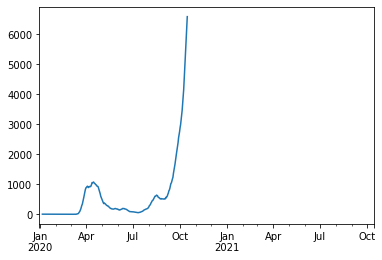

In [36]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

In [37]:
df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]

Keep exploring! Stay home, wash your hands, keep your distance.